# import module

In [1]:
%matplotlib inline
%load_ext nb_black
import matplotlib.pyplot as plt
import matplotlib as mpl

from numpy import *
import numpy as np

import pyemma
from pyemma.util.contexts import settings
import pyemma.plots as mplt
import pyemma.msm as msm

from __future__ import print_function
import mdtraj
import mdtraj as md

from tqdm import tqdm
from time import sleep

# import mdshare

<IPython.core.display.Javascript object>

# import data

In [2]:
# 导入轨迹文件
# pdb = "../6wuu.pdb"
# files = "../md_dry_jump_center_mol_center_fit.trr"
pdb = "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/nma_top.pdb"
files = "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/zong-msm-align.trr"
# files = (
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit1.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit2.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit3.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit4.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit5.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit6.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit7.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit8.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit9.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit10.trr",
# )
print(pdb)
print(files)

# 定义mdtraj
traj = md.load(pdb, files)
topology = traj.topology
print(traj)
print(topology)

/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/nma_top.pdb
/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/zong-msm-align.trr
<mdtraj.Trajectory with 1 frames, 4969 atoms, 316 residues, and unitcells>
<mdtraj.Topology with 1 chains, 316 residues, 4969 atoms, 4865 bonds>


<IPython.core.display.Javascript object>

# Feature selection

In [3]:
# nma多段残基坐标
# 106 - 119, 162 - 174，205 - 212, 243 - 251, 260 - 277 , 297 - 304
active_residue1 = arange(105, 119)
active_residue2 = arange(161, 174)
active_residue3 = arange(204, 212)
active_residue4 = arange(242, 251)
active_residue5 = arange(259, 277)
active_residue6 = arange(296, 304)

active_residue = (
    list(active_residue1)
    + list(active_residue2)
    + list(active_residue3)
    + list(active_residue4)
    + list(active_residue5)
    + list(active_residue6)
)
positions_feat = pyemma.coordinates.featurizer(pdb)
positions_feat.add_residue_COM(active_residue)
positions_data = pyemma.coordinates.load(files, features=positions_feat)
labels = ["backbone atom\npositions"]
positions_feat.describe()

['TRP106 COM-x (all)',
 'TRP106 COM-y (all)',
 'TRP106 COM-z (all)',
 'ALA107 COM-x (all)',
 'ALA107 COM-y (all)',
 'ALA107 COM-z (all)',
 'ASP108 COM-x (all)',
 'ASP108 COM-y (all)',
 'ASP108 COM-z (all)',
 'ASN109 COM-x (all)',
 'ASN109 COM-y (all)',
 'ASN109 COM-z (all)',
 'ASN110 COM-x (all)',
 'ASN110 COM-y (all)',
 'ASN110 COM-z (all)',
 'CYS111 COM-x (all)',
 'CYS111 COM-y (all)',
 'CYS111 COM-z (all)',
 'TYR112 COM-x (all)',
 'TYR112 COM-y (all)',
 'TYR112 COM-z (all)',
 'LEU113 COM-x (all)',
 'LEU113 COM-y (all)',
 'LEU113 COM-z (all)',
 'ALA114 COM-x (all)',
 'ALA114 COM-y (all)',
 'ALA114 COM-z (all)',
 'THR115 COM-x (all)',
 'THR115 COM-y (all)',
 'THR115 COM-z (all)',
 'ALA116 COM-x (all)',
 'ALA116 COM-y (all)',
 'ALA116 COM-z (all)',
 'LEU117 COM-x (all)',
 'LEU117 COM-y (all)',
 'LEU117 COM-z (all)',
 'LEU118 COM-x (all)',
 'LEU118 COM-y (all)',
 'LEU118 COM-z (all)',
 'THR119 COM-x (all)',
 'THR119 COM-y (all)',
 'THR119 COM-z (all)',
 'LEU162 COM-x (all)',
 'LEU162 CO

<IPython.core.display.Javascript object>

In [4]:
# 残基坐标
active_residue = [
    164,
    165,
    166,
    246,
    247,
    248,
    264,
    273,
    301,
    302,
    164,
    165,
    166,
    246,
    247,
    248,
    264,
    273,
    301,
    302,
]
active_residue1 = np.array(active_residue) - 1
positions_feat = pyemma.coordinates.featurizer(pdb)
positions_feat.add_residue_COM(active_residue1)
positions_data = pyemma.coordinates.load(files, features=positions_feat)
labels = ["backbone atom\npositions"]
positions_feat.describe()
# Adds a per-residue center of mass (COM) in cartesian coordinates

['ASP164 COM-x (all)',
 'ASP164 COM-y (all)',
 'ASP164 COM-z (all)',
 'VAL165 COM-x (all)',
 'VAL165 COM-y (all)',
 'VAL165 COM-z (all)',
 'ARG166 COM-x (all)',
 'ARG166 COM-y (all)',
 'ARG166 COM-z (all)',
 'ALA246 COM-x (all)',
 'ALA246 COM-y (all)',
 'ALA246 COM-z (all)',
 'PRO247 COM-x (all)',
 'PRO247 COM-y (all)',
 'PRO247 COM-z (all)',
 'PRO248 COM-x (all)',
 'PRO248 COM-y (all)',
 'PRO248 COM-z (all)',
 'TYR264 COM-x (all)',
 'TYR264 COM-y (all)',
 'TYR264 COM-z (all)',
 'TYR273 COM-x (all)',
 'TYR273 COM-y (all)',
 'TYR273 COM-z (all)',
 'THR301 COM-x (all)',
 'THR301 COM-y (all)',
 'THR301 COM-z (all)',
 'ASP302 COM-x (all)',
 'ASP302 COM-y (all)',
 'ASP302 COM-z (all)',
 'ASP164 COM-x (all)',
 'ASP164 COM-y (all)',
 'ASP164 COM-z (all)',
 'VAL165 COM-x (all)',
 'VAL165 COM-y (all)',
 'VAL165 COM-z (all)',
 'ARG166 COM-x (all)',
 'ARG166 COM-y (all)',
 'ARG166 COM-z (all)',
 'ALA246 COM-x (all)',
 'ALA246 COM-y (all)',
 'ALA246 COM-z (all)',
 'PRO247 COM-x (all)',
 'PRO247 CO

<IPython.core.display.Javascript object>

In [3]:
# 多段配对原子距离
# active_atom1 = topology.select("name CA and resi 99 to 120")
# active_atom2 = topology.select("name CA and resi 259 to 290")
# distances_feat = pyemma.coordinates.featurizer(pdb)
# distances_feat.add_distances(
#   distances_feat.pairs(active_atom1, excluded_neighbors=2), periodic=False
# )
# distances_feat.add_distances(
#   distances_feat.pairs(active_atom2, excluded_neighbors=2), periodic=False
# )
# distances_data = pyemma.coordinates.load(files, features=distances_feat)
# labels = ["backbone atom\ndistances"]
# distances_feat.describe()

<IPython.core.display.Javascript object>

In [1]:
# 多段残基坐标
#active_residue1 = arange(99, 120)
#active_residue2 = arange(259, 290)
#active_residue = list(active_residue1) + list(active_residue2)
#positions_feat = pyemma.coordinates.featurizer(pdb)
#positions_feat.add_residue_COM(active_residue)
#positions_data = pyemma.coordinates.load(files, features=positions_feat)
#labels = ["backbone atom\npositions"]
#positions_feat.describe()

In [ ]:
# 多段扭转角
# active_resi1 = "resi 100 to 120"
# active_resi2 = "resi 259 to 290"
# torsions_feat = pyemma.coordinates.featurizer(pdb)
# torsions_feat.add_sidechain_torsions(selstr=active_resi1, cossin=True, periodic=False)
# torsions_feat.add_sidechain_torsions(selstr=active_resi2, cossin=True, periodic=False)
# torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
# labels = ["backbone\ntorsions"]
# torsions_feat.describe()

In [ ]:
# add_sidechain_torsions (same to chi1 angle)
# torsions_feat = pyemma.coordinates.featurizer(pdb)
# torsions_feat.add_sidechain_torsions(
#    selstr="name CA and resi 259 to 289", cossin=True, periodic=False, which="chi1"
# )
# torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
# labels = ["backbone\ntorsions"]
# torsions_feat.describe()
# type(torsions_feat)
# type(torsions_data)

In [ ]:
# chi1 angle
# torsions_feat = pyemma.coordinates.featurizer(pdb)
# torsions_feat.add_chi1_torsions(
#    selstr="name CA and resi 259 to 289", cossin=True, periodic=False
# )
# torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
# labels = ["backbone\ntorsions"]
# torsions_feat.describe()
# type(torsions_feat)
# type(torsions_data)

# chi1 angle
# The chi1 angle is given in the side chain panel.
# Ideally, values of chi1 should be 60, 180, and -60.
# The chi1 angle is defined as the dihedral angle between the N -- CA -- CB -- XG of the same residue (where XG is either CG or OG)

In [3]:
# 主干扭转角
# torsions_feat = pyemma.coordinates.featurizer(pdb)
# torsions_feat.add_backbone_torsions(cossin=True, periodic=False)
# torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
# labels = ["backbone\ntorsions"]
# torsions_feat.describe()

<IPython.core.display.Javascript object>

In [3]:
# CA原子位置
# feat = pyemma.coordinates.featurizer(pdb)
# active_atom = topology.select("name CA and resi 259 to 289")
# feat.add_selection(active_atom)
# distances_data = pyemma.coordinates.load(files, features=feat)
# feat.describe()

<IPython.core.display.Javascript object>

In [4]:
# RMSD
# positions_feat = pyemma.coordinates.featurizer(pdb)
# positions_feat.add_minrmsd_to_ref(files, ref_frame=100, atom_indices="name CA and resi 259 to 289")
# positions_data = pyemma.coordinates.load(files, features=feat)
# labels = ["backbone atom\npositions"]
# positions_feat.describe()

# positions_feat.add_minrmsd_to_ref(traj, ref_frame=0, atom_indices=None, precentered=False)

<IPython.core.display.Javascript object>

In [6]:
# 多段残基坐标
# feat = pyemma.coordinates.featurizer(pdb)
# active_residue1 = arange(259, 290)
# active_residue2 = arange(220, 240)
# active_residue3 = arange(180, 200)
# active_residue  = list(active_residue1)+list(active_residue2)+list(active_residue3)
# feat.add_residue_COM(active_residue)
# distances_data = pyemma.coordinates.load(files, features=feat)
# feat.describe()

<IPython.core.display.Javascript object>

# Coordinate transform and discretization

## Time-lagged independent component analysis (TICA)

In [57]:
tica = pyemma.coordinates.tica(positions_data, lag=5)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)

<IPython.core.display.Javascript object>

ValueError: feature_labels must have the same dimension as the input data xyzall.

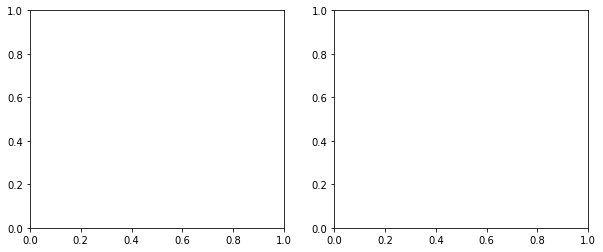

<IPython.core.display.Javascript object>

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
    feature_labels=["IC1", "IC2", "IC3", "IC4"],
    ylog=True,
    ignore_dim_warning=True,
)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel("IC 1")
axes[1].set_ylabel("IC 2")
fig.tight_layout()

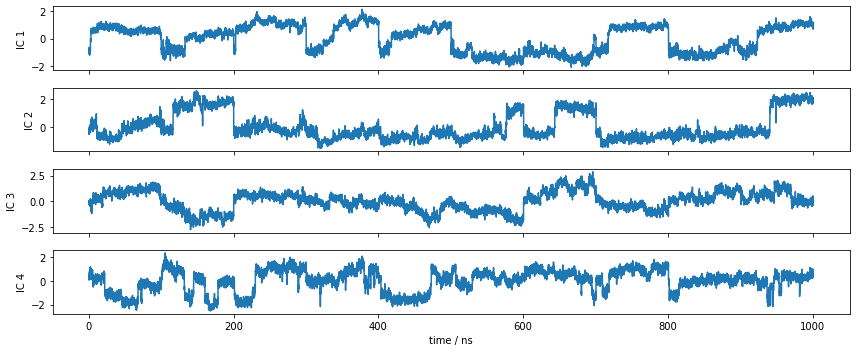

<IPython.core.display.Javascript object>

In [59]:
fig, axes = plt.subplots(4, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel("IC {}".format(i + 1))
axes[-1].set_xlabel("time / ns")
fig.tight_layout()

## Clustering and Discretization

bar: 100%|████████████████████████████████████████| 5/5 [00:01<00:00,  4.01it/s]


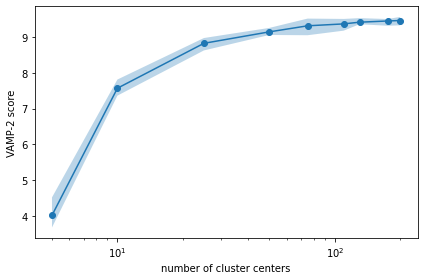

<IPython.core.display.Javascript object>

In [128]:
n_clustercenters = [5, 10, 25, 50, 75, 110, 130, 175, 200]

scores = np.zeros((len(n_clustercenters), 5))
for n, k in enumerate(n_clustercenters):
    for m in tqdm(range(5), ncols=80, desc="bar", colour="blue"):
        sleep(0.05)
        with pyemma.util.contexts.settings(show_progress_bars=False):
            _cl = pyemma.coordinates.cluster_kmeans(
                tica_output, k=k, max_iter=50, stride=50
            )
            _msm = pyemma.msm.estimate_markov_model(_cl.dtrajs, 5)
            scores[n, m] = _msm.score_cv(
                _cl.dtrajs, n=1, score_method="VAMP2", score_k=min(10, k)
            )

fig, ax = plt.subplots()
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), "-o")
ax.semilogx()
ax.set_xlabel("number of cluster centers")
ax.set_ylabel("VAMP-2 score")
fig.tight_layout()

In [67]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=75, max_iter=50, stride=10, fixed_seed=1
)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

initialize kmeans++ centers:   0%|                       | 0/75 [00:00<?, ?it/s]

kmeans iterations:   0%|                                 | 0/50 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

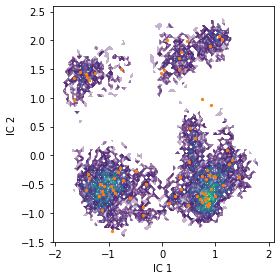

<IPython.core.display.Javascript object>

In [68]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c="C1")
ax.set_xlabel("IC 1")
ax.set_ylabel("IC 2")
fig.tight_layout()

# MSM estimation and validation

## Implied timescales

estimating BayesianMSM:   0%|                            | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='lag time / ns', ylabel='timescale / ns'>

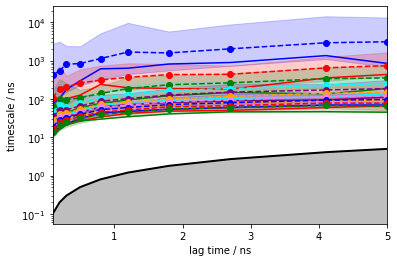

<IPython.core.display.Javascript object>

In [69]:
its = pyemma.msm.its(cluster.dtrajs, lags=50, nits=10, errors="bayes")
pyemma.plots.plot_implied_timescales(its, units="ns", dt=0.1)

In [70]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=5, dt_traj="0.1 ns")
print("fraction of states used = {:.2f}".format(msm.active_state_fraction))
print("fraction of counts used = {:.2f}".format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[590]: compute stat. inefficiencie

pyemma.msm.estimators.bayesian_msm.BayesianMSM[590]: Sampling MSMs:   0%| | 0/10

fraction of states used = 1.00
fraction of counts used = 1.00


<IPython.core.display.Javascript object>

## Chapman-Kolmogorov test

estimating BayesianMSM:   0%|                             | 0/5 [00:00<?, ?it/s]

(<Figure size 720x720 with 49 Axes>,
 array([[<AxesSubplot:ylabel='probability'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:ylabel='probability'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:ylabel='probability'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:ylabel='probability'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:ylabel='probability'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:ylabel='probability'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
   

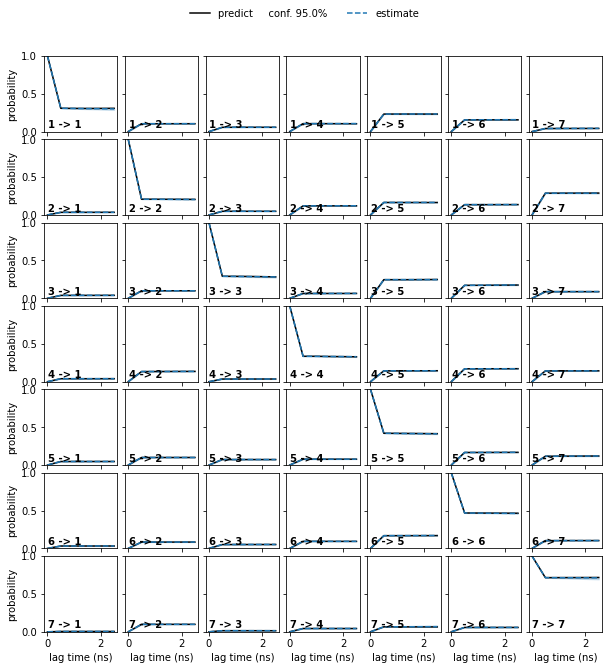

<IPython.core.display.Javascript object>

In [123]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

nstates = 7
cktest = msm.cktest(nstates, mlags=6)
pyemma.plots.plot_cktest(cktest, dt=0.1, units="ns")


# MSM spectral analysis

ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of ticklabels (16).

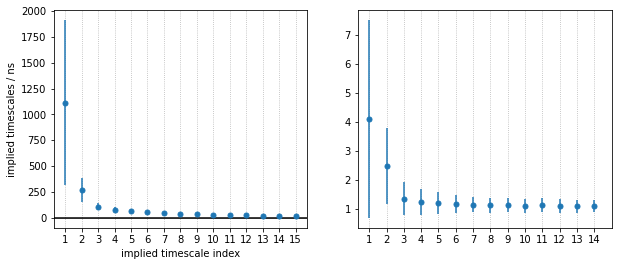

<IPython.core.display.Javascript object>

In [71]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return (
        ts[:-1]
        / ts[1:]
        * np.sqrt((ts_err[:-1] / ts[:-1]) ** 2 + (ts_err[1:] / ts[1:]) ** 2)
    )


nits = 15

timescales_mean = msm.sample_mean("timescales", k=nits)
timescales_std = msm.sample_std("timescales", k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1), timescales_mean, yerr=timescales_std, fmt=".", markersize=10
)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(timescales_mean, timescales_std),
    fmt=".",
    markersize=10,
    color="C0",
)

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis="x", linestyle=":")

axes[0].axhline(msm.lag * 0.1, lw=1.5, color="k")
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color="k")
axes[0].set_xlabel("implied timescale index")
axes[0].set_ylabel("implied timescales / ns")
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)], rotation=45
)
axes[1].set_xlabel("implied timescale indices")
axes[1].set_ylabel("timescale separation")
fig.tight_layout()

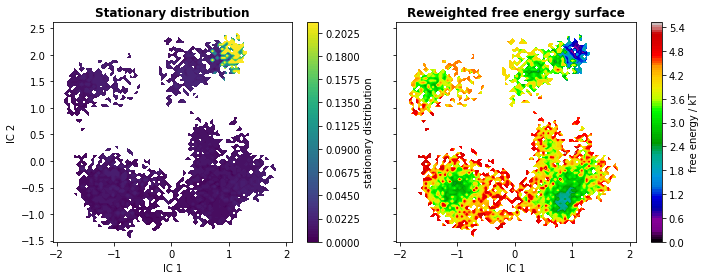

<IPython.core.display.Javascript object>

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label="stationary distribution"
)
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False
)
for ax in axes.flat:
    ax.set_xlabel("IC 1")
axes[0].set_ylabel("IC 2")
axes[0].set_title("Stationary distribution", fontweight="bold")
axes[1].set_title("Reweighted free energy surface", fontweight="bold")
fig.tight_layout()

The first eigenvector is one: True (min=0.9999999999994514, max=1.0000000000006768)


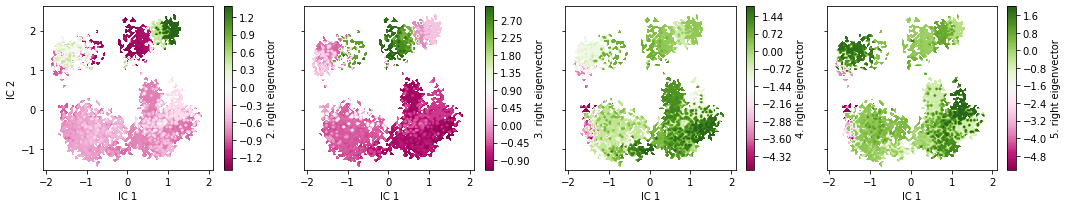

<IPython.core.display.Javascript object>

In [74]:
eigvec = msm.eigenvectors_right()
print(
    "The first eigenvector is one: {} (min={}, max={})".format(
        np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()
    )
)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated[:, :2].T,
        eigvec[dtrajs_concatenated, i + 1],
        ax=ax,
        cmap="PiYG",
        cbar_label="{}. right eigenvector".format(i + 2),
        mask=True
    )
    ax.set_xlabel("IC 1")
axes[0].set_ylabel("IC 2")
fig.tight_layout()

# PCCA & TPT 

## Perron cluster cluster analysis (PCCA)

In [106]:
nstates = 7
msm.pcca(nstates)
for i, s in enumerate(msm.metastable_sets):
    print("π_{} = {:f}".format(i + 1, msm.pi[s].sum()))
# print out the stationary probabilities of the metastable sets

π_1 = 0.039987
π_2 = 0.036080
π_3 = 0.039142
π_4 = 0.068136
π_5 = 0.274939
π_6 = 0.185232
π_7 = 0.356483


<IPython.core.display.Javascript object>

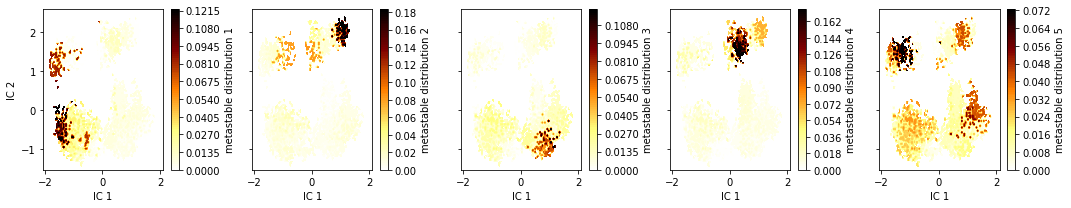

<IPython.core.display.Javascript object>

In [107]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated[:, :2].T,
        msm.metastable_distributions[i][dtrajs_concatenated],
        ax=ax,
        cmap="afmhot_r",
        mask=True,
        cbar_label="metastable distribution {}".format(i + 1)
    )
    ax.set_xlabel("IC 1")
axes[0].set_ylabel("IC 2")
fig.tight_layout()

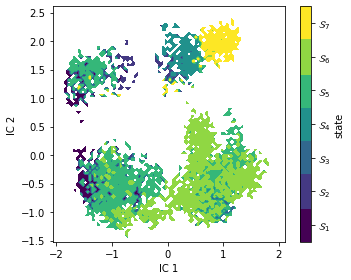

<IPython.core.display.Javascript object>

In [108]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax
)
ax.set_xlabel("IC 1")
ax.set_ylabel("IC 2")
misc["cbar"].set_ticklabels([r"$\mathcal{S}_%d$" % (i + 1) for i in range(nstates)])
fig.tight_layout()

In [109]:
# PCCA by positions
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)  # 聚合数目
positions_source = pyemma.coordinates.source(files, features=positions_feat)
pyemma.coordinates.save_trajs(
    positions_source,
    pcca_samples,
    outfiles=[
        "./data/nma/position/pcca{}_10samples.pdb".format(n + 1)
        for n in range(msm.n_metastable)
    ],
)

['./data/nma/position/pcca1_10samples.pdb',
 './data/nma/position/pcca2_10samples.pdb',
 './data/nma/position/pcca3_10samples.pdb',
 './data/nma/position/pcca4_10samples.pdb',
 './data/nma/position/pcca5_10samples.pdb',
 './data/nma/position/pcca6_10samples.pdb',
 './data/nma/position/pcca7_10samples.pdb']

<IPython.core.display.Javascript object>

In [137]:
# calculate rmsd
target1 = "./data/nma/position/pcca1_10samples.pdb"
first_frame1 = md.load_frame(target1, 0, topology)
rmsd1 = md.rmsd(first_frame1, traj, 0)

target2 = "./data/nma/position/pcca2_10samples.pdb"
first_frame2 = md.load_frame(target2, 0, topology)
rmsd2 = md.rmsd(first_frame2, traj, 0)

target3 = "./data/nma/position/pcca3_10samples.pdb"
first_frame3 = md.load_frame(target3, 0, topology)
rmsd3 = md.rmsd(first_frame3, traj, 0)

target4 = "./data/nma/position/pcca4_10samples.pdb"
first_frame4 = md.load_frame(target4, 0, topology)
rmsd4 = md.rmsd(first_frame4, traj, 0)

target5 = "./data/nma/position/pcca5_10samples.pdb"
first_frame5 = md.load_frame(target5, 0, topology)
rmsd5 = md.rmsd(first_frame5, traj, 0)

target6 = "./data/nma/position/pcca6_10samples.pdb"
first_frame6 = md.load_frame(target6, 0, topology)
rmsd6 = md.rmsd(first_frame6, traj, 0)

target7 = "./data/nma/position/pcca7_10samples.pdb"
first_frame7 = md.load_frame(target7, 0, topology)
rmsd7 = md.rmsd(first_frame7, traj, 0)

# target8 = "./data/nma/position/pcca8_1samples.pdb"
# first_frame8 = md.load_frame(target8, 0, topology)
# rmsd8 = md.rmsd(first_frame8, traj, 0)

print("state\tRMSD(nm)")
print(target1, float(rmsd1))
print(target2, float(rmsd2))
print(target3, float(rmsd3))
print(target4, float(rmsd4))
print(target5, float(rmsd5))
print(target6, float(rmsd6))
print(target7, float(rmsd7))
# print(target8, rmsd8)

# rmsda = rmsd * 10
# print("rmsda", "Å")

state	RMSD(nm)
./data/nma/position/pcca1_10samples.pdb 0.29619890451431274
./data/nma/position/pcca2_10samples.pdb 0.36341923475265503
./data/nma/position/pcca3_10samples.pdb 0.3236805498600006
./data/nma/position/pcca4_10samples.pdb 0.32879385352134705
./data/nma/position/pcca5_10samples.pdb 0.2774732708930969
./data/nma/position/pcca6_10samples.pdb 0.39774903655052185
./data/nma/position/pcca7_10samples.pdb 0.2851056158542633


<IPython.core.display.Javascript object>

In [114]:
# calculate probabilities and free energy of the metastable sets
print("state\tπ\t\tG/kT")
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    print("{}\t{:f}\t{:f}".format(i + 1, p, -np.log(p)))

state	π		G/kT
1	0.039987	3.219197
2	0.036080	3.322013
3	0.039142	3.240565
4	0.068136	2.686244
5	0.274939	1.291205
6	0.185232	1.686147
7	0.356483	1.031468


<IPython.core.display.Javascript object>

In [115]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(msm.metastable_sets[i], msm.metastable_sets[j])

from pandas import DataFrame

print("MFPT / ns:")
DataFrame(
    np.round(mfpt, decimals=2),
    index=range(1, nstates + 1),
    columns=range(1, nstates + 1),
)

MFPT / ns:


,1,2,3,4,5,6,7
1,0.00,1354.40,806.33,1194.67,63.33,328.35,471.20
2,810.29,0.00,870.37,469.58,148.31,361.16,561.41
3,938.59,1487.75,0.00,1425.96,55.09,240.46,451.06
4,747.12,718.67,878.22,0.00,152.31,389.19,565.26
5,927.51,1505.20,773.07,1437.64,0.00,351.11,322.58
6,916.98,1441.56,704.45,1399.30,75.85,0.00,482.18
7,1311.95,1889.29,1147.47,1821.20,247.51,733.25,0.00


<IPython.core.display.Javascript object>

In [116]:
A = msm.metastable_sets[0]
B = np.concatenate(msm.metastable_sets[1:])
print(
    "MFPT 1 -> other: ({:6.1f} ± {:5.1f}) ns".format(
        msm.sample_mean("mfpt", A, B), msm.sample_std("mfpt", A, B)
    )
)
print(
    "MFPT other -> 1: ({:.1f} ± {:5.1f}) ns".format(
        msm.sample_mean("mfpt", B, A), msm.sample_std("mfpt", B, A)
    )
)

MFPT 1 -> other: (  58.8 ±  35.8) ns
MFPT other -> 1: (9030.4 ± 19649.7) ns


<IPython.core.display.Javascript object>

## Transition path theory (TPT)

In [117]:
start, final = 0, 6
# The flux between metastable states can be computed and coarse-grained as follows. As an example, we compute the flux between metastable states 1 and 2
A = msm.metastable_sets[start]
B = msm.metastable_sets[final]
flux = pyemma.msm.tpt(msm, A, B)

cg, cgflux = flux.coarse_grain(msm.metastable_sets)
print(msm)
print(cgflux)
cgflux.pathways()

BayesianMSM(conf=0.95, connectivity='largest', core_set=None,
      count_mode='effective', dt_traj='0.1 ns', lag=5,
      milestoning_method='last_core', mincount_connectivity='1/n',
      nsamples=100, nsteps=8, reversible=True, show_progress=True,
      sparse=False, statdist_constraint=None)
ReactiveFlux(A=[0], B=[6], dt_model=[TimeUnit 0.5 ns],
       flux=array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 7.89346e-05, 5.46856e-04,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.33914e-05,
        4.44361e-06, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.49428e-05,
      ...0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00]]),
       gross_flux=array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 7.89346e-05, 5.46856e-04,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.79804e-04, 8.35270e-05,
        2.91923e-05, 0.00000e+00],
  

([array([0, 4, 6], dtype=int32),
  array([0, 3, 4, 6], dtype=int32),
  array([0, 3, 1, 4, 6], dtype=int32),
  array([0, 3, 1, 5, 2, 4, 6], dtype=int32)],
 [0.0005468561060541373,
  6.109953600296492e-05,
  1.3391409295504872e-05,
  4.443612463251039e-06])

<IPython.core.display.Javascript object>

In [118]:
(paths, pathfluxes) = cgflux.pathways(fraction=0.99)
cumflux = 0
print("Path flux\t\t%path\t%of total\tpath")
for i in range(len(paths)):
    cumflux += pathfluxes[i]
    print(
        pathfluxes[i],
        "\t",
        "%3.1f" % (100.0 * pathfluxes[i] / cgflux.total_flux),
        "%\t",
        "%3.1f" % (100.0 * cumflux / cgflux.total_flux),
        "%\t\t",
        paths[i] + 1,
    )

Path flux		%path	%of total	path
0.0005468561060541373 	 87.4 %	 87.4 %		 [1 5 7]
6.109953600296492e-05 	 9.8 %	 97.2 %		 [1 4 5 7]
1.3391409295504872e-05 	 2.1 %	 99.3 %		 [1 4 2 5 7]


<IPython.core.display.Javascript object>

(<Figure size 864x693.456 with 1 Axes>,
 array([[0.23698679, 0.        ],
        [0.65284769, 0.53944241],
        [1.        , 0.80261095],
        [0.56968633, 0.05006497],
        [0.28732185, 0.30385877],
        [0.96311817, 0.22197147],
        [0.        , 0.72168336]]))

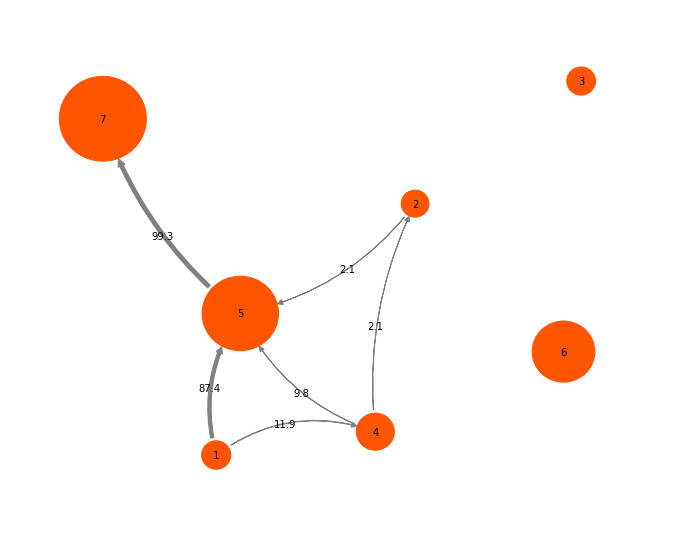

<IPython.core.display.Javascript object>

In [119]:
Fsub = cgflux.major_flux(fraction=0.99)
# print(Fsub)
Fsubpercent = 100.0 * Fsub / cgflux.total_flux
mplt.plot_network(
    Fsubpercent,
    state_sizes=cgflux.stationary_distribution,
    arrow_label_format="%3.1f",
    state_labels=range(1, nstates + 1),
)

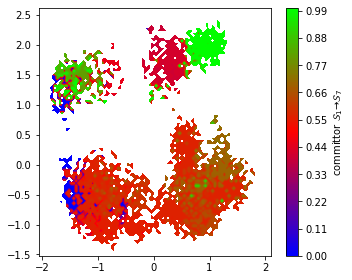

<IPython.core.display.Javascript object>

In [120]:
fig, ax = plt.subplots(figsize=(5, 4))

pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    flux.committor[dtrajs_concatenated],
    cmap="brg",
    ax=ax,
    mask=True,
    cbar_label=r"committor $\mathcal{S}_%d \to \mathcal{S}_%d$" % (start + 1, final + 1)
)
fig.tight_layout()

## MSM network

In [121]:
print(mfpt)
inverse_mfpt = np.zeros_like(mfpt)
print(inverse_mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]
print(inverse_mfpt)
disc_size = []
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    disc_size.append(int(p * 100))
print(disc_size)
type(disc_size)
disc_size = np.array(disc_size)
print(disc_size)
type(disc_size)

[[   0.         1354.39945057  806.33335162 1194.67105935   63.32983293
   328.34590238  471.20331627]
 [ 810.29371116    0.          870.36622538  469.58406015  148.3053307
   361.15861915  561.41245649]
 [ 938.59232693 1487.75011993    0.         1425.95536419   55.09277635
   240.46093775  451.05857245]
 [ 747.12295711  718.66949164  878.21779126    0.          152.31072558
   389.19137103  565.25998678]
 [ 927.51420825 1505.19860314  773.06505576 1437.63890616    0.
   351.11026049  322.57774004]
 [ 916.98336109 1441.55718057  704.44878098 1399.30332187   75.853248
     0.          482.18110379]
 [1311.95096    1889.28751066 1147.47030084 1821.20104212  247.51303944
   733.25408198    0.        ]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0.         0.00073833 0.00124018 0.00083705 0.01579035 0.00304557
  0.00212223]
 [0.00123412 0.         0.00114894 0.0

numpy.ndarray

<IPython.core.display.Javascript object>

(<Figure size 864x811.346 with 1 Axes>,
 array([[1.        , 0.93905781],
        [0.        , 0.        ],
        [0.32620836, 0.49577162],
        [0.41804326, 0.66342978],
        [0.67626943, 0.32541855],
        [0.47640748, 0.32505912],
        [0.6063028 , 0.53392287]]))

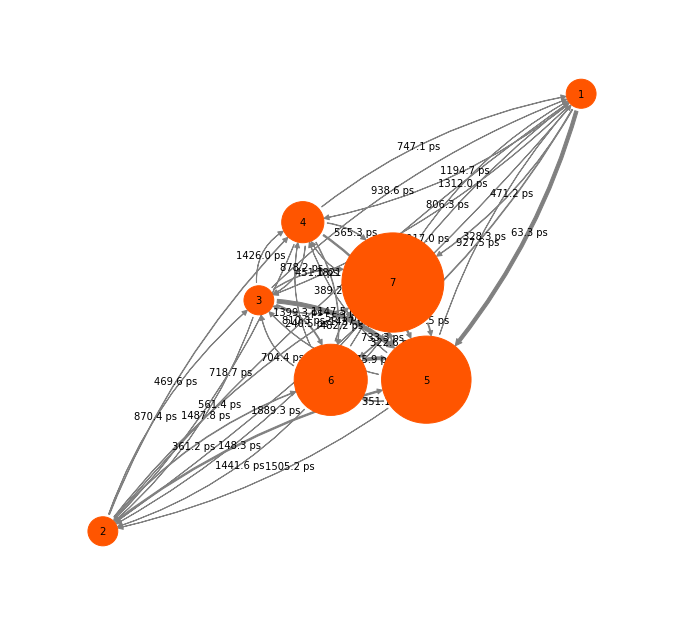

<IPython.core.display.Javascript object>

In [122]:
pyemma.plots.plot_network(
    inverse_mfpt,
    arrow_label_format="%.1f ps",
    arrow_labels=mfpt,
    state_labels=range(1, nstates + 1),
    state_sizes=disc_size,
)

# arrow_label_format="%.1f ps" -- float类型，输出时小数点后有一位小数
# arrow_label_format="%10.2f"  -- %10.2f 实数输出，10列，保留两位小数位
# state_labels=range(1, nstates + 1) -- 标签

In [ ]:
# print(msm.metastable_sets)

In [ ]:
# paths, path_fluxes = cgflux.pathways(fraction=0.99)
# print("percentage       \tpath")
# print("-------------------------------------")
# for i in range(len(paths)):
#    print((path_fluxes[i] / np.sum(path_fluxes)), " \t", paths[i] + 1)
#  print((path_fluxes[i] / np.sum(path_fluxes)), " \t", paths[i]) -- 未修正标签

In [ ]:
# print("\n**Gross flux illustration**: ")
# mplt.plot_flux(
#    cgflux,
#    arrow_label_format="%10.4f",
#    state_labels=range(1, nstates + 1),
#    attribute_to_plot="gross_flux",
#    state_sizes=disc_size,
# )
# state_labels=range(1, nstates + 1),